<a href="https://colab.research.google.com/github/arletteGuerrero12/COPREF/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [13]:
# traer las columnas

columnas = list(df.columns)
columnas


['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [18]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [69]:

customer_normalizado = pd.json_normalize(df['customerID'])
phone_normalizado = pd.json_normalize(df['PhoneService'])
internet_normalizado = pd.json_normalize(df['InternetService'])


In [70]:
# hacer join entre el dataframe original y las columnas normalizadas
datos = df.drop(columns=['customerID']).join(customer_normalizado)
datos = df.drop(columns=['PhoneService']).join(phone_normalizado)
datos = df.drop(columns=['InternetService']).join(internet_normalizado)



In [71]:
columnas_norm = list(df.columns)
columnas_norm
datos.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [73]:
try:
    datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)
    print("Conversión exitosa a float.")
except ValueError as e:
    print("Error en la conversión: ", e)

Error en la conversión:  could not convert string to float: ' '


In [74]:
datos['Charges.Total'] = datos['Charges.Total'].replace(['', ' '], np.nan)

In [75]:
try:
    datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)
    print("Conversión exitosa a float.")
except ValueError as e:
    print("Error en la conversión: ", e)

Conversión exitosa a float.


In [76]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [77]:
hay_cadenas_vacias = (datos['Churn'].str.len() == 0).any()
if hay_cadenas_vacias:
    print("'churn' contiene cadenas vacías.")
else:
    print("'churn' no contiene cadenas vacías.")

churn_vacias = (datos['Churn'] == '').sum()
churn_vacias

'churn' contiene cadenas vacías.


np.int64(224)

In [78]:
datos.loc[datos['Churn'] == '', 'Churn'] = 'No Info'

In [79]:
fc= datos['Churn'].value_counts()
print(fc)

Churn
No         5174
Yes        1869
No Info     224
Name: count, dtype: int64


In [80]:
def calcular_mean(index, series):
    valores = []
    if index > 0:
        valores.append(series[index - 1])
    if index < len(series) - 1:
        valores.append(series[index + 1])
    if valores:
        return np.mean(valores)
    return np.nan

In [81]:
mean_value = datos['Charges.Total'].mean()
datos['Charges.Total'] = datos['Charges.Total'].fillna(mean_value)

In [82]:
def validar_nan(columna):
  num_nan = datos[columna].isna().sum()
  return num_nan

In [83]:
nan_ct = validar_nan('Charges.Total')
print(f"Número de valores NaN en 'Charges.Total': {nan_ct}")
nan_cm = validar_nan('Charges.Monthly')
print(f"Número de valores NaN en 'Charges.Monthly': {nan_cm}")
nan_ter = validar_nan('tenure')
print(f"Número de valores NaN en 'tenure': {nan_ter}")
nan_scz = validar_nan('SeniorCitizen')
print(f"Número de valores NaN en 'SeniorCitizen': {nan_scz}")

Número de valores NaN en 'Charges.Total': 0
Número de valores NaN en 'Charges.Monthly': 0
Número de valores NaN en 'tenure': 0
Número de valores NaN en 'SeniorCitizen': 0


In [84]:
cn = list(df.columns)
cn
datos['Cuentas_Diarias'] = datos['Charges.Total'] / 30

In [85]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


#📊 Carga y análisis

In [86]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [87]:
datos_churn = datos['Churn']
datos_churn.info()
df_datos_churn = datos_churn.to_frame(name='Churn')

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [88]:
df_datos_churn['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [89]:
churn_total = df_datos_churn['Churn'].value_counts()
churn_total

,count
Churn,
No,5174
Yes,1869
No Info,224


In [90]:
df_churn_total = churn_total.to_frame(name='Total').reset_index()
df_churn_total

,Churn,Total
0,No,5174
1,Yes,1869
2,No Info,224


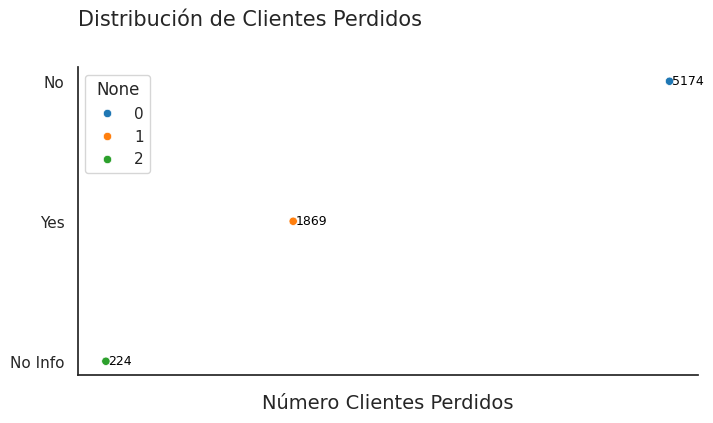

In [93]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.scatterplot(data=df_churn_total, x=df_churn_total['Total'], y=df_churn_total['Churn'], hue=df_churn_total.index, palette=palette)
  ax.set_title('Distribución de Clientes Perdidos',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_churn_total['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()



sns.set_theme(style='white')
generar_grafico('tab10')

In [92]:
datos_fidelizacion = datos[['Churn', 'Contract', 'tenure']]
datos_fidelizacion

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
2,Yes,Month-to-month,4
3,Yes,Month-to-month,13
4,Yes,Month-to-month,3
...,...,...,...
7262,No,One year,13
7263,Yes,Month-to-month,22
7264,No,Month-to-month,2
7265,No,Two year,67


In [94]:
datos_fidelizacion_out = datos_fidelizacion[datos_fidelizacion['Churn'] == 'Yes']
datos_fidelizacion_out

,Churn,Contract,tenure
2,Yes,Month-to-month,4
3,Yes,Month-to-month,13
4,Yes,Month-to-month,3
18,Yes,One year,45
19,Yes,Month-to-month,1
...,...,...,...
7243,Yes,Month-to-month,21
7246,Yes,Month-to-month,9
7260,Yes,Month-to-month,1
7261,Yes,Month-to-month,4


In [95]:
datos_fidelizacion_out.reset_index(inplace=True, drop=True)
datos_fidelizacion_out

,Churn,Contract,tenure
0,Yes,Month-to-month,4
1,Yes,Month-to-month,13
2,Yes,Month-to-month,3
3,Yes,One year,45
4,Yes,Month-to-month,1
...,...,...,...
1864,Yes,Month-to-month,21
1865,Yes,Month-to-month,9
1866,Yes,Month-to-month,1
1867,Yes,Month-to-month,4


In [97]:
frecuencia_valores = datos_fidelizacion_out['Contract'].value_counts()
print(frecuencia_valores)

total_mtm = (datos_fidelizacion_out['Contract'] == 'Month-to-month').sum()
total_year = (datos_fidelizacion_out['Contract'] == 'One year').sum()
total_ty = (datos_fidelizacion_out['Contract'] == 'Two year').sum()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


In [98]:
fidelizacion = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm, total_year, total_ty]
}
df_fidelizacion = pd.DataFrame(fidelizacion)
df_fidelizacion

,Tipo de Contrato,Total
0,Month-to-month,1655
1,One year,166
2,Two year,48


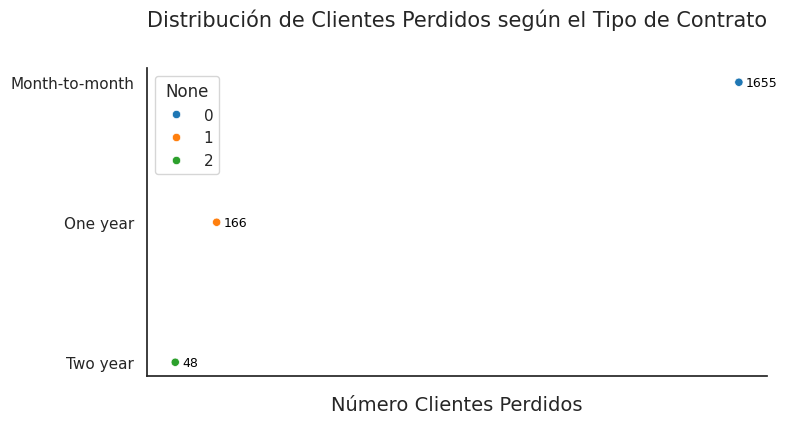

In [101]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.scatterplot(data=df_fidelizacion, x=df_fidelizacion['Total'], y=df_fidelizacion['Tipo de Contrato'], hue=df_fidelizacion.index, palette=palette)
  ax.set_title('Distribución de Clientes Perdidos según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Perdidos', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_fidelizacion['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()

sns.set_theme(style='white')
generar_grafico('tab10')


In [103]:
columnas_fidelizados = list(df_fidelizacion.columns)
columnas_fidelizados

datos_fidelizacion_in = datos_fidelizacion[datos_fidelizacion['Churn'] == 'No']
datos_fidelizacion_in

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
5,No,Month-to-month,9
6,No,Two year,71
7,No,Two year,63
...,...,...,...
7259,No,One year,7
7262,No,One year,13
7264,No,Month-to-month,2
7265,No,Two year,67


In [105]:
datos_fidelizacion_in.reset_index(inplace=True, drop=True)
datos_fidelizacion_in

frecuencia_valores_in = datos_fidelizacion_in['Contract'].value_counts()
print(frecuencia_valores_in)

Contract
Month-to-month    2220
Two year          1647
One year          1307
Name: count, dtype: int64


In [107]:
total_mtm_in = (datos_fidelizacion_in['Contract'] == 'Month-to-month').sum()
total_year_in = (datos_fidelizacion_in['Contract'] == 'One year').sum()
total_ty_in = (datos_fidelizacion_in['Contract'] == 'Two year').sum()
fidelizacion_in = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm_in, total_year_in, total_ty_in]
}
df_fidelizacion_in = pd.DataFrame(fidelizacion_in)
df_fidelizacion_in

,Tipo de Contrato,Total
0,Month-to-month,2220
1,One year,1307
2,Two year,1647


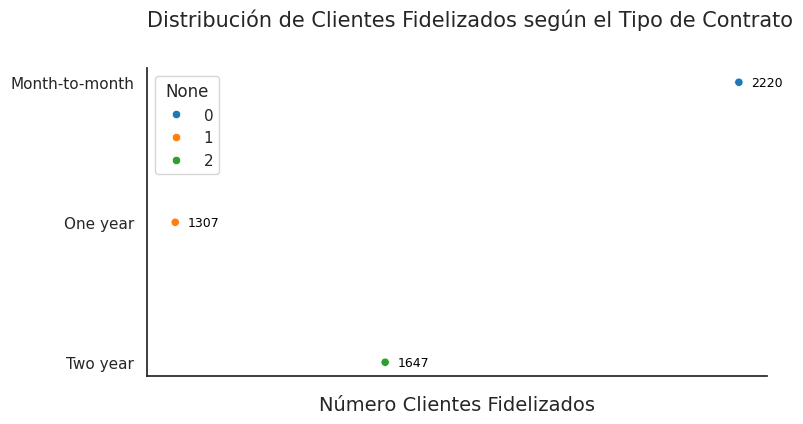

In [108]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.set(xticklabels=[])

  ax = sns.scatterplot(data=df_fidelizacion_in, x=df_fidelizacion_in['Total'], y=df_fidelizacion_in['Tipo de Contrato'], hue=df_fidelizacion_in.index, palette=palette)
  ax.set_title('Distribución de Clientes Fidelizados según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_xlabel('Número Clientes Fidelizados', fontsize=14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_fidelizacion_in['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()
sns.set_theme(style='white')
generar_grafico('tab10')

In [109]:
datos_fidelizacion_in = datos_fidelizacion[datos_fidelizacion['Churn'] == 'No']
datos_fidelizacion_in

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
5,No,Month-to-month,9
6,No,Two year,71
7,No,Two year,63
...,...,...,...
7259,No,One year,7
7262,No,One year,13
7264,No,Month-to-month,2
7265,No,Two year,67


In [110]:
datos_fidelizacion_in.reset_index(inplace=True, drop=True)
datos_fidelizacion_in

,Churn,Contract,tenure
0,No,One year,9
1,No,Month-to-month,9
2,No,Month-to-month,9
3,No,Two year,71
4,No,Two year,63
...,...,...,...
5169,No,One year,7
5170,No,One year,13
5171,No,Month-to-month,2
5172,No,Two year,67


In [111]:
frecuencia_valores_in = datos_fidelizacion_in['Contract'].value_counts()
print(frecuencia_valores_in)

Contract
Month-to-month    2220
Two year          1647
One year          1307
Name: count, dtype: int64


In [112]:
total_mtm_in = (datos_fidelizacion_in['Contract'] == 'Month-to-month').sum()
total_year_in = (datos_fidelizacion_in['Contract'] == 'One year').sum()
total_ty_in = (datos_fidelizacion_in['Contract'] == 'Two year').sum()
fidelizacion_in = {
    'Tipo de Contrato': ['Month-to-month', 'One year', 'Two year'],
    'Total': [total_mtm_in, total_year_in, total_ty_in]
}
df_fidelizacion_in = pd.DataFrame(fidelizacion_in)
df_fidelizacion_in

,Tipo de Contrato,Total
0,Month-to-month,2220
1,One year,1307
2,Two year,1647


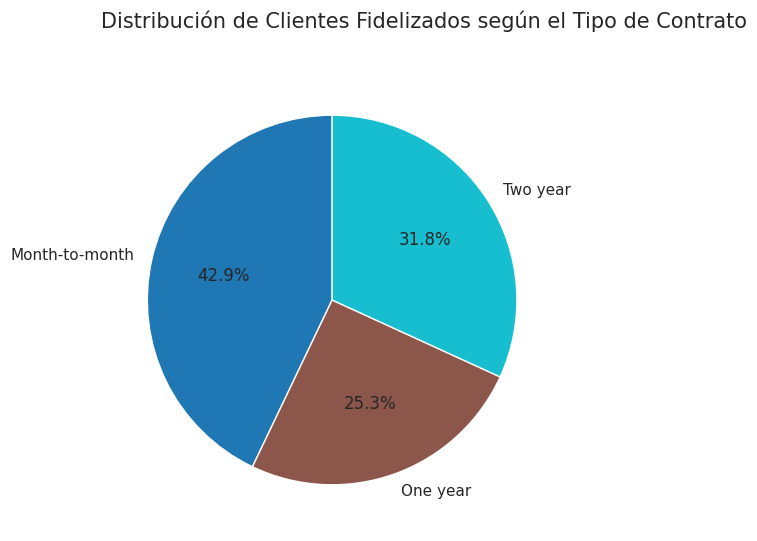

In [113]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(6, 6))

  df_fidelizacion_in.groupby('Tipo de Contrato')['Total'].sum().plot(
      kind='pie', autopct='%1.1f%%', startangle=90, colormap=palette, ax=ax
  )

  ax.set_title('Distribución de Clientes Fidelizados según el Tipo de Contrato',
              loc='left', fontsize=15, pad=30)
  ax.set_ylabel('')  # Ocultar la etiqueta del eje Y

  plt.show()

  sns.set_theme(style='white')
generar_grafico('tab10')

In [114]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [115]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [117]:
datos_soporte = datos[['Churn', 'MultipleLines', 'TechSupport']]
datos_soporte

,Churn,MultipleLines,TechSupport
0,No,No,Yes
1,No,Yes,No
2,Yes,No,No
3,Yes,No,No
4,Yes,No,Yes
...,...,...,...
7262,No,No,Yes
7263,Yes,Yes,No
7264,No,No,No
7265,No,No,Yes


In [119]:
datos_soporte_out = datos_soporte[datos_soporte['Churn'] == 'Yes']
datos_soporte_out
datos_soporte_out.reset_index(inplace=True, drop=True)
datos_soporte_out

,Churn,MultipleLines,TechSupport
0,Yes,No,No
1,Yes,No,No
2,Yes,No,Yes
3,Yes,No,No
4,Yes,No phone service,No
...,...,...,...
1864,Yes,No,No
1865,Yes,Yes,No
1866,Yes,No,No
1867,Yes,No,No internet service


In [120]:
frecuencia_valores_soporte = datos_soporte_out['InternetService'].value_counts()
frecuencia_valores_soporte.info()

KeyError: 'InternetService'

#📄Informe final